<a href="https://colab.research.google.com/github/JuWanMaeng/papaer-review/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1)

In [ ]:
print(x_train.shape,x_val.shape)

(45000, 32, 32, 3) (5000, 32, 32, 3)


In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,y_test))
validation_ds = tf.data.Dataset.from_tensor_slices((x_val,y_val))

In [ ]:
def process_images(image, label):
    
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (227,227))
    return image, label

In [ ]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", validation_ds_size)

Training data size: 45000
Test data size: 10000
Validation data size: 5000


In [ ]:
train_ds = train_ds.batch(batch_size=128, drop_remainder=True)
test_ds = test_ds.batch(batch_size=128, drop_remainder=True)
val_ds = validation_ds.batch(batch_size=128, drop_remainder=True)

In [ ]:
train_ds=train_ds.map(process_images)
test_ds=test_ds.map(process_images)
val_ds=val_ds.map(process_images)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,BatchNormalization,Dropout

In [ ]:
class AlexNet(Sequential):
  def __init__(self):
    super().__init__()

    self.add(Conv2D(96,11,strides=4,activation='relu',input_shape=(227,227,3)))
    self.add(BatchNormalization())
    self.add(MaxPool2D(3,2))

    self.add(Conv2D(256,5,strides=1,activation='relu',padding='same'))
    self.add(BatchNormalization())
    self.add(MaxPool2D(3,2))

    self.add(Conv2D(384,3,strides=1,activation='relu',padding='same'))
    self.add(BatchNormalization())
    self.add(Conv2D(384,3,strides=1,activation='relu',padding='same'))
    self.add(BatchNormalization())
    self.add(Conv2D(256,3,strides=1,activation='relu',padding='same'))
    self.add(BatchNormalization())
    self.add(MaxPool2D(3,2))
    
    self.add(Flatten())
    self.add(Dense(4096,activation='relu'))
    self.add(Dropout(0.5))
    self.add(Dense(4096,activation='relu'))
    self.add(Dropout(0.5))
    self.add(Dense(10,activation='softmax'))

    self.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')


In [ ]:
model=AlexNet()

In [ ]:
model.summary()

Model: "alex_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885

In [ ]:
es=keras.callbacks.EarlyStopping(patience=3)
history=model.fit(train_ds,epochs=50,
                  validation_data=val_ds,callbacks=[es]
                  )

Epoch 1/50
351/351 [==============================] - 63s 91ms/step - loss: 7.7117 - accuracy: 0.2545 - val_loss: 1.8662 - val_accuracy: 0.3508
Epoch 2/50
351/351 [==============================] - 31s 89ms/step - loss: 1.7403 - accuracy: 0.4018 - val_loss: 1.4161 - val_accuracy: 0.5044
Epoch 3/50
351/351 [==============================] - 31s 89ms/step - loss: 1.4228 - accuracy: 0.4918 - val_loss: 1.4757 - val_accuracy: 0.4736
Epoch 4/50
351/351 [==============================] - 31s 89ms/step - loss: 1.2872 - accuracy: 0.5472 - val_loss: 1.3606 - val_accuracy: 0.5523
Epoch 5/50
351/351 [==============================] - 31s 89ms/step - loss: 1.1871 - accuracy: 0.5864 - val_loss: 1.1264 - val_accuracy: 0.6088
Epoch 6/50
351/351 [==============================] - 32s 90ms/step - loss: 1.0994 - accuracy: 0.6207 - val_loss: 1.1895 - val_accuracy: 0.5998
Epoch 7/50
351/351 [==============================] - 31s 89ms/step - loss: 1.0198 - accuracy: 0.6508 - val_loss: 1.1167 - val_accuracy:

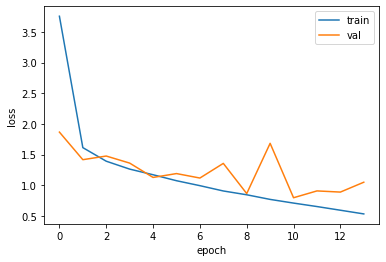

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(test_ds)

71/78 [==========================>...] - ETA: 0s - loss: 1.0815 - accuracy: 0.6678